### Random Walk Generation

In [1]:
import pandas as pd
import numpy as np

In [4]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # convert returns to prices
    prices = s_0 * (1+rets).cumprod()
    return prices
    

In [8]:
p = gbm(n_years=10, n_scenarios=3)

In [9]:
p.head()

,0,1,2
0,105.606393,91.164854,98.854127
1,97.063065,93.454407,97.430150
2,99.464822,93.253199,103.742343
3,97.557578,99.345430,107.725799
4,100.596421,101.151713,111.129660


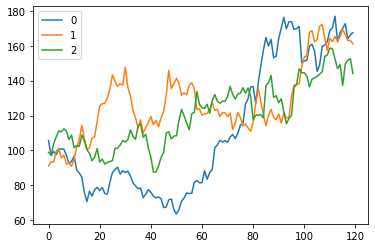

In [10]:
p.plot()

In [21]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    rets[0] = 1
    # convert returns to prices
    prices = s_0 * (1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    '''
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    '''
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # convert returns to prices
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices
    

In [18]:
%timeit gbm0(n_years=5, n_scenarios=1000)

5.33 ms ± 720 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%timeit gbm1(n_years=5, n_scenarios=1000)

4.44 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


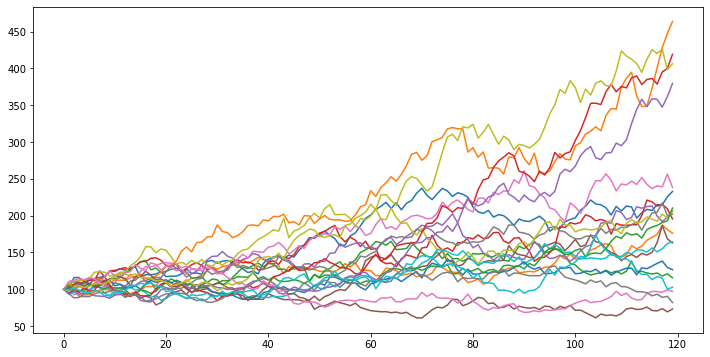

In [22]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [24]:
gbm1(n_scenarios=3).head()

,0,1,2
0,100.000000,100.000000,100.000000
1,103.065160,99.974967,94.803507
2,103.404881,99.123655,95.688690
3,105.604010,102.140842,97.967959
4,110.014531,107.499089,95.356948
